In [1]:
import elevation
from osgeo import gdal
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Loading the SRTM raster data by lat lon

SRTM = Shuttle Radar Topography Mission  
https://en.wikipedia.org/wiki/Shuttle_Radar_Topography_Mission  
https://www2.jpl.nasa.gov/srtm/

In [2]:
# specify the bounding box for the target area
wa_bounds = (-124.733174, 45.543541, -116.915989, 49.002494)

In [3]:
# set some variables for the SRTM dataset
cache_dir='./data/elevation'
product='SRTM3'
output='wa_%s_full.tif' % product;

In [4]:
# load in the data
elevation.seed(bounds=wa_bounds, cache_dir=cache_dir, product=product, max_download_tiles=999)

'./data/elevation/SRTM3'

In [5]:
# build a vrt file for faster loading
!gdalbuildvrt ./data/elevation/SRTM3/cache/srtm.vrt ./data/elevation/SRTM3/cache/*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


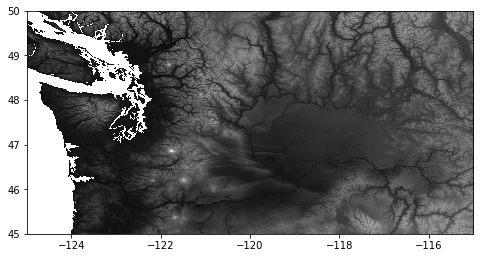

In [6]:
# open using rasterio and plot
srtm_vrt = rasterio.open('./data/elevation/SRTM3/cache/srtm.vrt')
f,ax = plt.subplots(figsize=(8,10))
show(srtm_vrt, ax=ax,cmap='gray')

In [11]:
# subset to target area
ds = gdal.Open('./data/elevation/SRTM3/cache/srtm.vrt')
ds = gdal.Translate('./data/elevation/SRTM3/cache/srtm_wa_subset.vrt', ds, projWin = [-121.562236, 46.710126,-121.918009, 46.97267])
ds = None

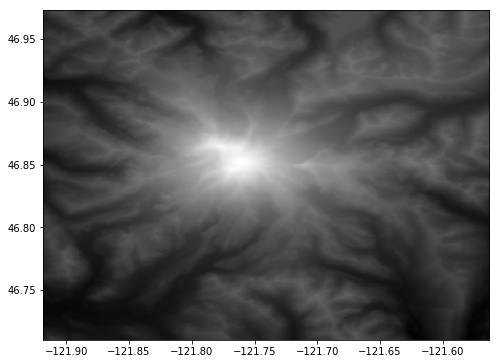

In [13]:
# plot target area
srtm_wa_subset_vrt = rasterio.open('./data/elevation/SRTM3/cache/srtm_wa_subset.vrt')
f,ax = plt.subplots(figsize=(8,10))
show(srtm_wa_subset_vrt, ax=ax,cmap='gray')